In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

csvPath = "D:\\ARTIFICIAL INTELLIGENCE\\2020\\KLASIFIKASI\\labeled_2019_merged_edited.csv"

data = pd.read_csv(csvPath)

data['label'] = data['label'].fillna(value=0.0)
print (data.shape)

data = data.dropna(axis=0, subset=['namaoutput', 'namaoutcome', 'namaprogram', 'namakegiatan', 'satuanoutput', 'satuanoutcome'])
print (data.shape)

(2224, 34)
(1953, 34)


In [5]:
class MyLabelEncoder():

    def transform(self, X, y=None, **fit_params):
        enc = preprocessing.LabelEncoder()
        encc = enc.fit(X)
        enc_data = enc.transform(X).reshape(-1, 1)

        return enc_data

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X).reshape(-1, 1)

    def fit(self, X, y=None, **fit_params):
        return self

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.naive_bayes import MultinomialNB
import sklearn.model_selection as model_selection

transformer_feature_merge = FeatureUnion([
    ('satuanoutcome_encoding', 
     Pipeline([('extract_field',
                FunctionTransformer(lambda x: x['satuanoutcome'], 
                                    validate=False)),
               ('label_encoder', 
                MyLabelEncoder())])),
    ('satuanoutput_encoding', 
     Pipeline([('extract_field',
                FunctionTransformer(lambda x: x['satuanoutput'], 
                                    validate=False)),
               ('label_encoder', 
                MyLabelEncoder())])),
    ('program_tfidf', 
     Pipeline([('extract_field',
                FunctionTransformer(lambda x: x['namaprogram'], 
                                    validate=False)),
               ('tfidf', 
                TfidfVectorizer())])),
    ('kegiatan_tfidf', 
     Pipeline([('extract_field',
                FunctionTransformer(lambda x: x['namakegiatan'], 
                                    validate=False)),
               ('tfidf', 
                TfidfVectorizer())])),
    ('output_tfidf', 
     Pipeline([('extract_field',
                FunctionTransformer(lambda x: x['namaoutput'], 
                                    validate=False)),
               ('tfidf', 
                TfidfVectorizer())])),
    ('outcome_tfidf', 
     Pipeline([('extract_field', 
                FunctionTransformer(lambda x: x['namaoutcome'], 
                                    validate=False)),
               ('tfidf', 
                TfidfVectorizer())]))
])

In [7]:
data_column_used = data[['namaprogram', 'satuanoutcome', 'satuanoutput', 'namakegiatan', 'namaoutput', 'namaoutcome']]

In [8]:
data_target = data['label'].astype(int)

In [81]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_column_used, data_target, train_size=0.9,test_size=0.1,random_state=42)


In [82]:
pipeline = Pipeline([
    ('feats', transformer_feature_merge),
    ('MNB', MultinomialNB())  # classifier
])

In [83]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('satuanoutcome_encoding',
                                                 Pipeline(steps=[('extract_field',
                                                                  FunctionTransformer(func=<function <lambda> at 0x000001D1CFB6AEA0>)),
                                                                 ('label_encoder',
                                                                  <__main__.MyLabelEncoder object at 0x000001D1CFAB1630>)])),
                                                ('satuanoutput_encoding',
                                                 Pipeline(steps=[('extract_field',
                                                                  FunctionTransformer(func=<function <lam...
                                                                 ('tfidf',
                                                                  TfidfVectorizer())])),
                                         

In [84]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

def get_text_satuan_outcome(df):
    return df['satuanoutcome']

def get_text_satuan_output(df):
    return df['satuanoutput']

def get_text_nama_program(df):
    return df['namaprogram']

def get_text_nama_kegiatan(df):
    return df['namakegiatan']

def get_text_nama_output(df):
    return df['namaoutput']

def get_text_nama_outcome(df):
    return df['namaoutcome']

vec = make_union(*[
    make_pipeline(FunctionTransformer(get_text_satuan_outcome, validate=False), MyLabelEncoder()),
    make_pipeline(FunctionTransformer(get_text_satuan_output, validate=False), MyLabelEncoder()),
    make_pipeline(FunctionTransformer(get_text_nama_program, validate=False), TfidfVectorizer()),
    make_pipeline(FunctionTransformer(get_text_nama_kegiatan, validate=False), TfidfVectorizer()),
    make_pipeline(FunctionTransformer(get_text_nama_output, validate=False), TfidfVectorizer()),
    make_pipeline(FunctionTransformer(get_text_nama_outcome, validate=False), TfidfVectorizer())
])


In [85]:
data

,nourut,label,tahun anggaran,kodefungsi,namafungsi,kodeurusanprogram,namaurusanprogram,kodeurusanpelaksana,namaurusanpelaksana,kodeskpd,...,namalokasi,namaakunutama,namaakunkelompok,namaakunjenis,namaakunobjek,namaakunrinci,namaakunsubrinci,namaakunsubsubrinci,namasumberdana,nilaianggaran
0,1,1.0,2019,10,Pendidikan,1101,Pendidikan,1101,Pendidikan,1101,...,NaN,BELANJA,BELANJA OPERASI,Belanja Barang dan Jasa,Belanja Perjalanan Dinas,Belanja Perjalanan Dinas Luar Daerah,Perjalanan Dinas Luar Daerah,NaN,APBD Kabupaten / Kota,420000000.0
1,2,1.0,2019,10,Pendidikan,1101,Pendidikan,1101,Pendidikan,1101,...,NaN,BELANJA,BELANJA OPERASI,Belanja Barang dan Jasa,Belanja Perjalanan Dinas,Belanja Perjalanan Dinas Dalam Daerah,Perjalanan Dinas Dalam Daerah,NaN,APBD Kabupaten / Kota,121851000.0
2,3,1.0,2019,10,Pendidikan,1101,Pendidikan,1101,Pendidikan,1101,...,NaN,BELANJA,BELANJA OPERASI,Belanja Barang dan Jasa,"Belanja Bahan Pakai Habis , Belanja Makanan da...","Belanja Alat Tulis Kantor , Belanja Makanan da...","Belanja ATK Sidang PAK , Tim Sekretariat , Tim...",NaN,APBD Kabupaten / Kota,65000000.0
3,4,1.0,2019,10,Pendidikan,1101,Pendidikan,1101,Pendidikan,1101,...,kabupaten serang,BELANJA,BELANJA OPERASI,Belanja Barang dan Jasa,"Belanja Bahan / Material , Belanja Cetak dan P...","Belanja Perlengkapan Peserta , Belanja Penggan...","ATK Peserta Pembelajaran Tuntas , ATK Peserta ...",NaN,Dana Alokasi Umum,520000000.0
4,5,1.0,2019,10,Pendidikan,1101,Pendidikan,1101,Pendidikan,1101,...,NaN,BELANJA,BELANJA OPERASI,Belanja Barang dan Jasa,"Belanja Bahan Pakai Habis , Belanja Jasa Kanto...","Belanja Alat Tulis Kantor , Belanja Perangko ,...","Kertas HVS 70 gram , Kertas Concord , Tinta Pr...",NaN,Dana Alokasi Umum,400000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2220,0.0,2019,1,Pelayanan Umum,3008,Fungsi Penunjang Pemerintahan Umum,3008,Fungsi Penunjang Pemerintahan Umum,3008,...,NaN,BELANJA,BELANJA OPERASI,Belanja Barang dan Jasa,"Belanja Jasa Kantor , Belanja Cetak dan Pengga...","Belanja Dokumentasi , Belanja promosi dan publ...","Belanja cetak foto , Belanja ucapan , promosi ...",NaN,APBD Kabupaten / Kota,602040000.0
2220,2221,0.0,2019,1,Pelayanan Umum,3008,Fungsi Penunjang Pemerintahan Umum,3008,Fungsi Penunjang Pemerintahan Umum,3008,...,NaN,BELANJA,BELANJA OPERASI,Belanja Barang dan Jasa,"Belanja Pakaian Dinas dan Atributnya , Belanja...","Belanja Pakaian Dinas Harian ( PDH ) , Belanja...","Belanja pakaian dinas harian ( PDH ) , PPTK , ...",NaN,APBD Kabupaten / Kota,53200000.0
2221,2222,0.0,2019,1,Pelayanan Umum,3008,Fungsi Penunjang Pemerintahan Umum,3008,Fungsi Penunjang Pemerintahan Umum,3008,...,NaN,BELANJA,BELANJA OPERASI,Belanja Barang dan Jasa,"Belanja Pakaian Dinas dan Atributnya , Belanja...","Belanja Pakaian Sipil Harian ( PSH ) , Belanja...","Belanja pakaian sipil harian ( PSH ) , Belanja...",NaN,APBD Kabupaten / Kota,306230000.0
2222,2223,0.0,2019,1,Pelayanan Umum,3008,Fungsi Penunjang Pemerintahan Umum,3008,Fungsi Penunjang Pemerintahan Umum,3008,...,NaN,BELANJA,BELANJA OPERASI,Belanja Barang dan Jasa,"Belanja Honorarium PNS , Belanja Tenaga Ahli /...",Belanja Honorarium Panitia Pelaksana Kegiatan ...,"Honor PPTK , Honor Pelaksana Administrasi , Ho...",NaN,Dana Alokasi Umum,696285000.0


In [86]:
import joblib

neo_pipeline = Pipeline([
    ('thevec', vec),
    ('MNB', MultinomialNB())  # classifier
])

neo_pipeline.fit(X_train, y_train)

joblib.dump(neo_pipeline, 'neo_pipeline.pkl') 

['neo_pipeline.pkl']

In [90]:
labels = neo_pipeline.predict(X_test)

joblib_model = joblib.load('neo_pipeline.pkl')

labels_saved = joblib_model.predict(X_test)

diff = labels - labels_saved

diff

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

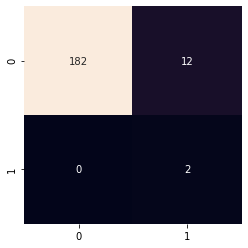

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib as plt
mat = confusion_matrix(labels, y_test)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, labels)

0.9387755102040817

In [52]:
from sklearn.metrics import classification_report

print (classification_report(y_test, labels, target_names=['non-doc', 'doc']))

              precision    recall  f1-score   support

     non-doc       0.99      0.93      0.96       289
         doc       0.10      0.50      0.16         4

    accuracy                           0.93       293
   macro avg       0.54      0.72      0.56       293
weighted avg       0.98      0.93      0.95       293

